# Modelo de regresión lineal

Se puede definir al modelo de regresión lineal como una función $f(x)$ con polinomio de grado 1 y que se puede esquematizar de la siguiente manera:  

$$ y = \alpha + \beta (x)$$

Donde $y$ seria la variable dependiente, $x$ la variable independiente, $\beta$ la pendiente o inclinación de la recta y $\alpha$ el corte con el eje.  

Inicialmente vamos a considerar el error, como la diferencia entre el dato real y el valor estimado:  
$$e_i = (y_i - Y_e(x_i))$$

El objetivo es minimizar la suma de los errores al cuadrado (**técnica de minimos cuadrados**) sobre los puntos de un data set:
$$ min \sum_{i = 1}^{n} e_i^{2} = \sum_{i = 1}^{n} (y_i - Y_e(x_i))^2 = \sum_{i = 1}^{n} (y_i - (\alpha + \beta*x_i))^2$$

Utilizando el cálculo diferencial, se puede estimar que los valores de $\beta$ y $\alpha$ pueden hallarse de la siguiente manera:  

$$\beta = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2} = \frac{Cov(x,y)}{Var(x,y)}$$  
$$\alpha = \bar{y} - \beta*\bar{x}$$

Donde $\bar{x}, \bar{y}$ representan las medias respectivas de cada variable

Aunque usualmente, el modelo lineal no puede explicar en un 100% la distribución de probabilidad de un data set. Es por esto, que a nuestra ecuación que explica el modelo siempre debemos adicionarle un parametro que estima el error:  
$$ y = \alpha + \beta (x) + E$$


### Ejercicio
#### Modelo con datos simulados

* $y = a + b*x$
* x : 100 valores distribuidos según N(1.5, 2.5)

* Ye = 8 + 0.6 * x + e --> estimación del modelo
* e: Estará distribuido según una normal N(0, 0.8)

In [8]:
import pandas as pd
import numpy as np

In [9]:
x = 1.5 + 2.5 * np.random.randn(100)

In [10]:
residuos = 0 + 0.8*np.random.randn(100)

In [11]:
y_estim = 8 + 0.6*x

In [12]:
y_actual = 8 + 0.86*x + residuos

In [13]:
x_lista = x.tolist()
y_estim_list = y_estim.tolist()
y_actual_lista = y_actual.tolist()

In [14]:
dataframe = pd.DataFrame(
    {
        "x": x_lista,
        "y_actual": y_actual_lista,
        "y_predicc": y_estim_list
    }

)

In [15]:
dataframe.head()

,x,y_actual,y_predicc
0,3.138270,10.249401,9.882962
1,4.845707,12.573140,10.907424
2,2.340302,9.938458,9.404181
3,0.485361,8.519220,8.291216
4,6.161695,14.095165,11.697017


In [16]:
import matplotlib.pyplot as plt

In [17]:
y_mean = [np.mean(y_actual) for i in range(1, len(x_lista)+ 1)]

Text(0.5, 1.0, 'Valor actual Vs. Predicción')

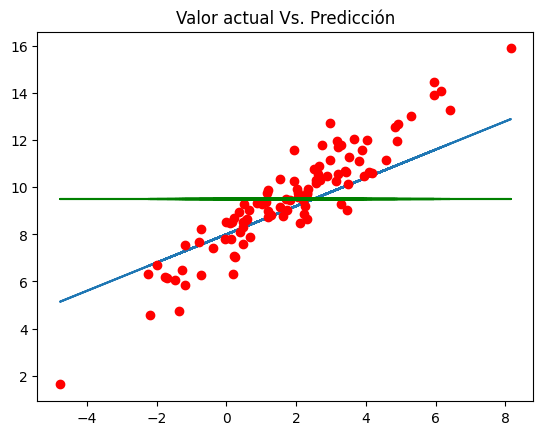

In [18]:
%matplotlib inline
plt.plot(x, y_estim)
plt.plot(x, y_actual, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor actual Vs. Predicción")

Sin embargo, se pueden observar puntos que se alejan de la recta estimada del modelo. Son datos conocidos como datos observados (**y_actual**). El desplazamiento de los puntos observados con respecto a la recta del modelo (y_estim) es conocido como **SSD** (suma de la diferencia de los cuadrados). Adicionalmente, observamos que tambien existe una separación entre los puntos observados y la respectiva recta de las medias trazada en color verde. Esta distancia se conoco como **SST** (suma de los cuadrados totales). Y por ultimo, tenemos la distancia que se halla entre la recta estimada y la recta de los promedios (Recta azul y recta verde respectivamente). A esta diferencia se le conoce como **SSR** (suma de los cuadrados de la regresión).

$$ SST = SSR + SSD $$
$$ R^2 = \frac{SSR}{SST} $$

In [19]:
dataframe["SSR"]= (dataframe["y_predicc"] - np.mean(y_actual))**2
dataframe["SSD"]= (dataframe["y_predicc"]-dataframe["y_actual"])**2
dataframe["SST"]= (dataframe["y_actual"]-np.mean(y_actual))**2

In [20]:
dataframe.head()

,x,y_actual,y_predicc,SSR,SSD,SST
0,3.138270,10.249401,9.882962,0.143401,0.134278,0.555208
1,4.845707,12.573140,10.907424,1.968818,2.774610,9.417911
2,2.340302,9.938458,9.404181,0.010020,0.285452,0.188512
3,0.485361,8.519220,8.291216,1.471520,0.051986,0.970341
4,6.161695,14.095165,11.697017,4.808101,5.751114,21.076236


In [21]:
SSR = sum(dataframe["SSR"])
SSD = sum(dataframe["SSD"])
SST = sum(dataframe["SST"])

In [22]:
SSR

184.92869571452928

In [23]:
SSD

142.36649397589218

In [24]:
SST

496.8270177736098

In [25]:
r2 = SSR/SST

In [26]:
r2

0.37221948303704394

El modelo se ajusta de acuerdo al comportamiento de los datos

(array([ 5.,  8., 13., 25., 27., 12.,  6.,  2.,  1.,  1.]),
 array([-2.99704171, -2.34605079, -1.69505986, -1.04406894, -0.39307801,
         0.25791291,  0.90890383,  1.55989476,  2.21088568,  2.86187661,
         3.51286753]),
 <BarContainer object of 10 artists>)

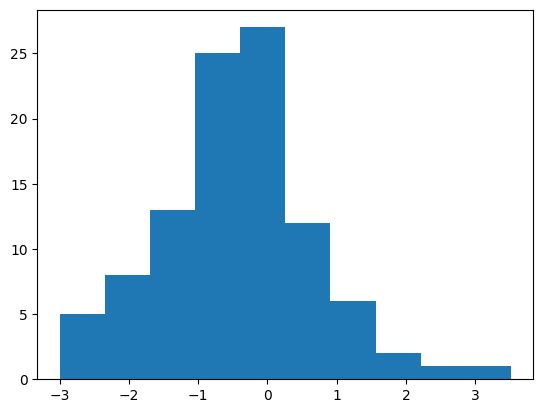

In [27]:
plt.hist(dataframe["y_predicc"]-dataframe["y_actual"])

## Obteniendo la recta de regresión

In [28]:
x_mean = np.mean(dataframe["x"])
y_mean = np.mean(dataframe["y_actual"])
x_mean, y_mean

(1.8074553434775098, 9.504278633590799)

In [29]:
dataframe["beta_n"] = (dataframe["x"]-x_mean)*(dataframe["y_actual"]-y_mean)
dataframe["beta_d"] = (dataframe["x"]-x_mean)**2

In [30]:
beta = sum(dataframe["beta_n"])/sum(dataframe["beta_d"])

In [31]:
alpha = y_mean - beta * x_mean

In [32]:
alpha, beta

(7.756115009428042, 0.9671960253243783)

EL modelo obtenido por regresión es:  
$$ y = 8.05222622741971 + 0.7985107375816947*x$$

In [33]:
dataframe["y_modelo"] = alpha + beta*dataframe["x"]

In [34]:
dataframe.head()

,x,y_actual,y_predicc,SSR,SSD,SST,beta_n,beta_d,y_modelo
0,3.138270,10.249401,9.882962,0.143401,0.134278,0.555208,0.991620,1.771068,10.791438
1,4.845707,12.573140,10.907424,1.968818,2.774610,9.417911,9.323974,9.230974,12.442864
2,2.340302,9.938458,9.404181,0.010020,0.285452,0.188512,0.231351,0.283926,10.019646
3,0.485361,8.519220,8.291216,1.471520,0.051986,0.970341,1.302341,1.747934,8.225554
4,6.161695,14.095165,11.697017,4.808101,5.751114,21.076236,19.989817,18.959400,13.715682


In [35]:
SSR = sum((dataframe["y_modelo"]-y_mean)**2)
SSD = sum ((dataframe["y_modelo"]-dataframe["y_actual"])**2)
SST = sum((dataframe["y_actual"]-y_mean)**2)

In [36]:
SSR, SSD, SST

(434.7459243458867, 62.081093427723324, 496.8270177736098)

In [37]:
r2_ajustado = SSR/SST
r2_ajustado

0.8750448522185408

## El p valor

Para comprobar la existencia de una relación lineal, planteamos el contraste de hipótesis.

$$
\left.
H_0 : \beta = 0 \atop
H_a : \beta \neq 0 
\right\}
$$

### Error estándar residual (RSE)

In [38]:
RSE = np.sqrt(SSD/(len(dataframe)-2))
RSE

0.7959149107667541

### Implementando la regresión lineal con statsmodel y sklearn

#### Con statsmodel

In [39]:
import statsmodels.formula.api as smf

In [40]:
data = pd.read_csv('../datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Utilizamos el metodo ols, e indicamos en el parametro formula, los campos que queremos evaluar.

In [41]:
linear_model = smf.ols(formula= "Sales~TV", data=data).fit()
linear_model

El método fit, nos permite encontrar la recta que mejor se ajusta, teniendo en cuenta la minimización de la suma del cuadrado de los errores.

In [42]:
linear_model.params

Intercept    7.032594
TV           0.047537
dtype: float64

Los parametros arrojados por el modelo, nos permiten construir una ecuación que representa la regresión lineal:

$$Sales = 7.032594 + 0.047537\cdot TV$$

Ahora miremos los p-values de este modelo, para validar el nivel de significancia.

In [43]:
linear_model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Los p-values con valores tan pequeños indicarian que se rechaza la hipotesis nula, cuando la media es igual a 0

In [44]:
linear_model.rsquared

0.611875050850071

In [45]:
linear_model.rsquared_adj

0.6099148238341623

Para realizar un resumen de todos los estadisticos:

In [46]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.47e-42
Time:                        11:39:50   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ahora vamos usar el modelo para intentar realizar una predicción de ventas.

In [47]:
sales_prediction = linear_model.predict(pd.DataFrame(data['TV']))
sales_prediction

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

Ahora, realizaremos una representación gráfica para validar el ajuste de la predicción, con los datos reales.

Text(5, -45, '$y = 7.0326 + 0.0475 \\cdot TV$')

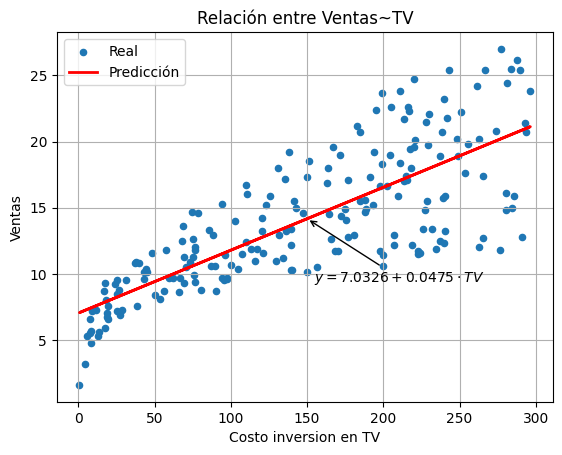

In [48]:
data.plot(kind='scatter', x = 'TV', y = 'Sales', label = 'Real')
plt.plot(pd.DataFrame(data.TV), sales_prediction, color='red', lw = 2, label = 'Predicción')
plt.title('Relación entre Ventas~TV')
plt.xlabel('Costo inversion en TV')
plt.ylabel('Ventas')

plt.legend(loc = 'upper left')

plt.grid()
plt.annotate(r'$y = 7.0326 + 0.0475 \cdot TV$', xy = (150, 7.0326+(150*0.0475)), xycoords='data', xytext=(5, -45), textcoords='offset points', 
             arrowprops= dict(arrowstyle = '->'))

Vamos a incorporar los datos de la predicción en el dataset original.

In [49]:
data['prediccion_venta'] = 7.032594 + 0.047537*data['TV']
data['RSE'] = (data['Sales']-data['prediccion_venta'])**2
SSD = sum(data['RSE'])
RSE = np.sqrt(SSD/(len(data)-2))
SSD, RSE

(2102.5305838896525, 3.258656369238098)

In [50]:
data.head()

,TV,Radio,Newspaper,Sales,prediccion_venta,RSE
0,230.1,37.8,69.2,22.1,17.970858,17.049816
1,44.5,39.3,45.1,10.4,9.147990,1.567528
2,17.2,45.9,69.3,9.3,7.850230,2.101832
3,151.5,41.3,58.5,18.5,14.234450,18.194921
4,180.8,10.8,58.4,12.9,15.627284,7.438076


Con el valor de los residuos, vamos a hallar el promedio de los mismos,

In [51]:
sales_m = np.mean(data['Sales'])
error = RSE/sales_m
error

0.23238768901680143

Encontramos un error del 23% de los datos que no puede ser explicado por el modelo

Dibiujemos la distribución de los errores

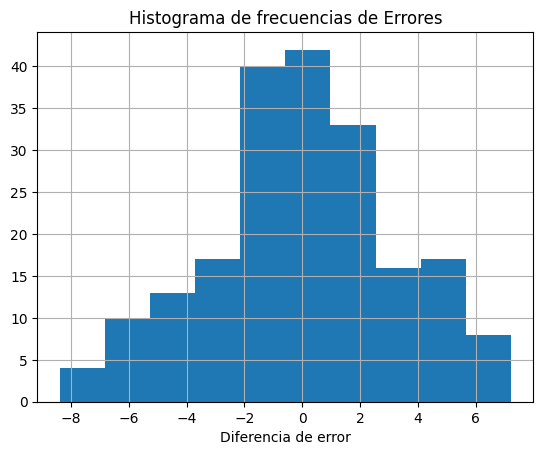

In [52]:
plt.hist(data['Sales']-data['prediccion_venta'])
plt.title('Histograma de frecuencias de Errores')
plt.xlabel('Diferencia de error')

plt.grid()
plt.show()

## Regresión lineal múltiple con statsmodels

Al evidenciar algunos de los estadisticos, como el error residual, que no explica un 23% del modelos, es necesario acudir a la evaluación de alguna de las otras variables independientes para moder mejorar el comportamiento del modelo de regresión lineal.

* Sales ~ TV
* Sales ~ Newspaper
* Sales ~ Radio
* Sales ~ TV ~ Newspaper
* Sales ~ TV ~ Radio
* Sales ~ Periodico ~ Radio
* Sales ~ TV~Periodico ~ Radio

Hay que tener en cuenta que entre mas variables predictoras puedan intervenir en el modelo, mayor sera la complejidad de escenarios que deberán ser tenidos en cuenta para formular un modelo de regresión. Afortunadamente, pandas cuenta con una funcionalidad que nos permite identificar las correlaciones fuertes entre las variables predictoras y las variables a predecir.

In [53]:
data = pd.read_csv('../datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [54]:
correlaciones  = data[['Sales', 'TV', 'Newspaper', 'Radio']].corr()
correlaciones.style.background_gradient(cmap='coolwarm') ## otras gamas de colores RdYlGn o bwr o PuOr

,Sales,TV,Newspaper,Radio
Sales,1.000000,0.782224,0.228299,0.576223
TV,0.782224,1.000000,0.056648,0.054809
Newspaper,0.228299,0.056648,1.000000,0.354104
Radio,0.576223,0.054809,0.354104,1.000000


Podemos evidencias que las dos variables predictoras que mas aportan al modelo son la **TV** y la **Radio**. Por otro lado, el periodoco al tener una correlación debil, podria ser una candidata para descarte dentro de nuestro modelo.

In [55]:
linear_model_2 = smf.ols(formula="Sales~TV+Radio", data = data).fit()

In [56]:
linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           4.83e-98
Time:                        11:39:52   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Probaremos con la newspaper tambien

In [57]:
linear_model_3 = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()

In [58]:
linear_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           3.95e-45
Time:                        11:39:52   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
linear_model_2.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

Podemos evidencias notoriamente que el modelo que incluyó al periodico y la televisión no aportó lo suficiente al modelo como para reducier es estistico R. Por lo tanto, comprobamos que el modelo mas optimo tendria en cuenta las variables predictoras **TV y radio**.

Nuestro modelo seria:

$$ sales = 2.921100 + (0.045755 \cdot TV) + (0.187994 \cdot Radio)$$

Y nuestras predicciones serian:

In [60]:
sales_prediction_2 = linear_model_2.predict(data[['TV', 'Radio']])
sales_prediction_2

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

In [61]:
SSD = sum((data['Sales'] - sales_prediction_2)**2)
SSD

556.9139800676184

In [62]:
RSE =np.sqrt(SSD/(len(data)-2-1))
RSE

1.681360912508001

Hemos disminuido considerablemente el valor del error residual del modelo de 3.25 a 1.68. Ahora calculemos el porcetaje que representaria

In [63]:
error = RSE/sales_m
error

0.1199045043685506

Tenemos un 11% de error que no es explicado por el modelo.

### Multicolinealidad

Esta es la razon por la cual no se agraga el periodico al modelo. Podemos evidenciar esto en la matriz de correlaciones de las variables predictoras.

Vamos a utilizar el factor de inflacion de la varianza (VIF) para validar los comportamientos de colinealidad entre variables predictoras. Este factor debe calcularse para cada una de las variables, y si este es muy alto, este predictor deberá ser eliminado del modelo.

Si VIF = 1, las variables no estan correlacionadas; si es menor que 5, las variables tienen una correlacion moderada y se pueden quedar en el modelo. Si es el caso de que el vif es mayor que 5, las variables estaran altamente correlacionadas, y deben ser eliminadas del modelo.

In [64]:
# newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_np = smf.ols(formula='Newspaper~TV+Radio', data= data).fit()
rsquared_np = lm_np.rsquared
vif = 1/(1-rsquared_np)
vif

1.1451873787239288

In [65]:
# Tv ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula='TV~Newspaper+Radio', data= data).fit()
rsquared_tv = lm_tv.rsquared
vif_tv = 1/(1-rsquared_tv)
vif_tv

1.00461078493965

In [66]:
# Radio ~ Newspaper + Tv -> R^2 VIF = 1/(1-R^2)
lm_radio = smf.ols(formula='Radio~Newspaper+TV', data= data).fit()
rsquared_radio = lm_radio.rsquared
vif_radio = 1/(1-rsquared_radio)
vif_radio

1.1449519171055353

Es evidente que la radio y el periodico tienen un vif similar, por lo cual se puede concluir que estas dos estan correlacionadas, por lo tanto, una de estas puede ser candidata a eliminar, de acuerdo con la precision que aporten al modelo, como ya lo comprobamos anteriormente.

## Validando el modelo
### Dividir en conjunto de entrenamiento y conjunto de test

Aconsejable realizar este proceso al iniciar el proyecto.

In [67]:
data = pd.read_csv('../datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


(array([ 8., 13., 29., 36., 40., 26., 24., 13.,  7.,  4.]),
 array([-2.13815341, -1.66476911, -1.19138482, -0.71800052, -0.24461622,
         0.22876807,  0.70215237,  1.17553667,  1.64892096,  2.12230526,
         2.59568956]),
 <BarContainer object of 10 artists>)

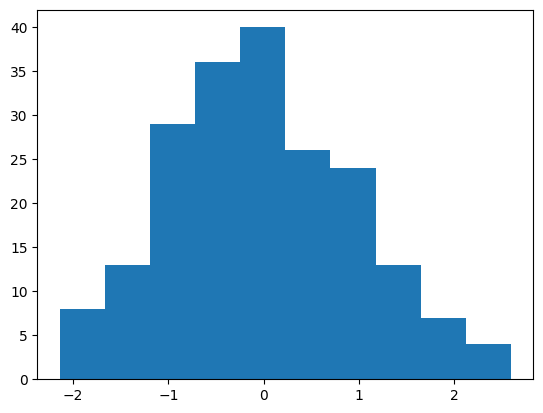

In [68]:
a = np.random.randn(len(data))
plt.hist(a)

In [69]:
check = (a <0.8)
training = data[check]
test = data[~check]
len(training), len(test)

(160, 40)

In [70]:
linear_model_2 = smf.ols(formula="Sales~TV+Radio", data = training).fit()
linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     634.5
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           6.00e-76
Time:                        11:39:53   Log-Likelihood:                -312.41
No. Observations:                 160   AIC:                             630.8
Df Residuals:                     157   BIC:                             640.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7439      0.350      7.836      0.000       2.052       3.436
TV             0.0463      0.002     29.243      0.000       0.043       0.049
Radio          0.1894      0.009     20.658      0.000       0.171       0.208
==============================================================================
Omnibus:                       52.897   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.961
Skew:                          -1.383   Prob(JB):                     1.34e-29
Kurtosis:                       6.505   Cond. No.                         443.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Modelo lineal resultante:

$$sales = 2.9490 + (0.0452 \cdot TV) + (0.1900 \cdot Radio)$$

#### Validacion con el conjunto de testing

In [71]:
sales_prediction = linear_model_2.predict(test)
sales_prediction

8       3.539433
11     17.220837
13      8.693281
20     18.092842
21     14.690727
26     14.903705
31     11.261942
36     23.385889
40     16.334514
43     13.905060
52     20.652250
55     21.301350
56      8.404290
63     13.101102
70     17.749456
72     10.234423
73      9.808896
76      4.318932
78      8.657367
81     14.612315
82     10.072099
89     16.877000
96     12.546722
97     15.274186
98     24.156357
106     5.983868
107     6.982089
111    21.121625
113    16.340903
116    11.891225
120    14.356141
123    14.991806
127     6.453467
146    15.232344
152    16.297290
168    17.177446
182     6.423068
184    18.517947
192     4.316067
195     5.211642
dtype: float64

In [72]:
SSD = sum((test['Sales']-sales_prediction)**2)
SSD

93.20631383346641

In [73]:
RSE= np.sqrt(SSD/(len(test)-2-1))
RSE

1.5871640000537623

In [74]:
sales_mean =  np.mean(test['Sales'])
error = RSE/sales_mean
error

0.1164463683091535

# Regresion linea con sklearn

In [75]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [76]:
data = pd.read_csv('../datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [77]:
feature_columns = ['TV', 'Radio', 'Newspaper']
X = data[feature_columns]
Y = data['Sales']

In [78]:
estimator = SVR(kernel='linear')
selector = RFE(estimator, n_features_to_select=2, step=1) # 2 es el numero de variables predictoras
selector = selector.fit(X, Y)

Columnas seleccionadas:

In [79]:
selector.support_

array([ True,  True, False])

Se toman por orden las columnas TV y Radio.

In [80]:
selector.ranking_

array([1, 1, 2])

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
X_pred = X[["TV", "Radio"]]
linear_model = LinearRegression()
linear_model.fit(X_pred, Y)

LinearRegression()

In [83]:
linear_model.intercept_, linear_model.coef_

(2.921099912405138, array([0.04575482, 0.18799423]))

In [84]:
linear_model.score(X_pred, Y)

0.8971942610828956

### Variables Categóricas

Una variable categórica $x_k$, por ejemplo:

$$ x_k = \left\{ 1 ~si~elcliente~es~hombre \atop 0 ~si~el~cliente~es~mujer \right. $$

El modelo se convierte en:

$$ \left\{ y_{model} = \alpha + \beta_1x_1 + \beta_2x_2 + \cdot\cdot\cdot + \beta_{k1} + \cdot\cdot\cdot + \beta_{n}x_n + \epsilon ~~~~~~si~el~cliente~es~hombre \atop y_{model} = \alpha + \beta_1x_1 + \beta_2x_2 + \cdot\cdot\cdot + \beta_{n}x_n + \epsilon~~~~~~~~~~~~~~~~~~~~~~~~~~si~el~cliente~es~mujer \right.$$

In [85]:
data = pd.read_csv('../datasets/ecom-expense/Ecom Expense.csv')
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


Generamos dummy variables

In [86]:
dummy_gender = pd.get_dummies(data['Gender'], prefix='Gender')
dummy_city_tier = pd.get_dummies(data['City Tier'], prefix='City_tier')

In [87]:
dummy_city_tier.head()

,City_tier_Tier 1,City_tier_Tier 2,City_tier_Tier 3
0,True,False,False
1,False,True,False
2,False,True,False
3,True,False,False
4,False,True,False


In [88]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False


Extrayendo las columnas del dataset

In [89]:
columns = data.columns.values.tolist()
columns

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [90]:
data_new = data[columns].join(dummy_gender)
columns = data_new.columns.values.tolist()
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False


In [91]:
data_new = data_new[columns].join(dummy_city_tier)
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_tier_Tier 1,City_tier_Tier 2,City_tier_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False,True,False,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False,False,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True,False,True,False
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False,True,False,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False,False,True,False


Definir las columnas que actuaran como variables predictoras

In [92]:
feature_columns = ["Monthly Income", "Transaction Time", "Gender_Female", "Gender_Male", "City_tier_Tier 1", "City_tier_Tier 2", "City_tier_Tier 3", "Record"]

Segmentamos el dataset en conjunto de variables predictoras y variable a predecir.

In [93]:
X = data_new[feature_columns]
Y = data_new["Total Spend"] 

In [94]:
lineal_model_categoric = LinearRegression()
lineal_model_categoric.fit(X, Y)

LinearRegression()

In [95]:
lineal_model_categoric.intercept_, lineal_model_categoric.coef_

(-79.4171303013718,
 array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
         7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02]))

In [96]:
list(zip(feature_columns, lineal_model_categoric.coef_))

[('Monthly Income', 0.1475389804920574),
 ('Transaction Time', 0.15494612549589526),
 ('Gender_Female', -131.0250132555464),
 ('Gender_Male', 131.0250132555464),
 ('City_tier_Tier 1', 76.76432601049535),
 ('City_tier_Tier 2', 55.13897430923232),
 ('City_tier_Tier 3', -131.90330031972775),
 ('Record', 772.2334457445644)]

Validando el coeficiente $R^2$

In [97]:
lineal_model_categoric.score(X, Y)

0.9179923586131016

El modelo puede ser escrito como:

$$ Total~Spend = -79.4171303013718 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time) + \\
(-131.0250132555464*Gender\_Female) + (131.0250132555464*Gender\_Male) + (76.76432601049535*City\_tier\_Tier~1) + \\
(55.13897430923232*City\_tier\_Tier~2) + (-131.90330031972775*City\_tier\_Tier~3) + (772.2334457445644*Record) $$

Ahora, debemos evaluar el modelo, dados los escenarios de las variables categótricas:

* Si es hombre y vive en city_tier_1: 
$$ Total~Spend = -79.4171303013718 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time) + \\
 131.0250132555464 + 76.76432601049535 + (772.2334457445644*Record) $$
* Si es hombre y vive en city tier 2:
$$ Total~Spend = -79.4171303013718 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time) + \\
131.0250132555464 + 55.13897430923232 + (772.2334457445644*Record) $$
* Si es hombre y vive en city tier 3:
$$ Total~Spend = -79.4171303013718 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time) + \\
(131.0250132555464 -131.90330031972775 + (772.2334457445644*Record) $$
* Si es mujer y vivie en city tier 1:
$$ Total~Spend = -79.4171303013718 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time) \\
-131.0250132555464+ 76.76432601049535  + (772.2334457445644*Record) $$
* si es mujer y vivier en city tier 2:
$$ Total~Spend = -79.4171303013718 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time)  \\
-131.0250132555464 +  55.13897430923232  + (772.2334457445644*Record) $$
* si es mujer y vive en city tier 3:
$$ Total~Spend = -79.4171303013718 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time) \\
-131.0250132555464  -131.90330031972775 + (772.2334457445644*Record) $$

In [98]:
data_new['prediccion'] = -79.4171303013718 + (0.1475389804920574*data_new['Monthly Income']) + (0.15494612549589526*data_new['Transaction Time']) + (-131.0250132555464*data_new['Gender_Female']) + (131.0250132555464*data_new['Gender_Male']) + (76.76432601049535*data_new['City_tier_Tier 1']) + (55.13897430923232*data_new['City_tier_Tier 2']) + (-131.90330031972775*data_new['City_tier_Tier 3']) + (772.2334457445644*data_new['Record']) 

In [99]:
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_tier_Tier 1,City_tier_Tier 2,City_tier_Tier 3,prediccion
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False,True,False,False,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False,False,True,False,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True,False,True,False,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False,True,False,False,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False,False,True,False,3581.980335


Calculo de la suma de los cuadrados de las diferencias

In [100]:
SSD = np.sum((data_new['prediccion'] - data_new['Total Spend'])**2)
SSD

1517733985.3408165

Desviacion estandar de las diferencias de los residuos

In [101]:
RSE = np.sqrt(SSD/(len(data_new)-len(feature_columns)-1))
RSE

803.1318809818166

In [102]:
sales_meand = np.mean(data_new['Total Spend'])
error = RSE/sales_meand
error

0.1303113568029416

## Enmascarando variables categóricas

* Si es hombre y vive en city_tier_1: 
$$ Total~Spend = 128.37220896466997+ (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time) \\
+ (772.2334457445644*Record) $$
* Si es hombre y vive en city tier 2:
$$ Total~Spend = 106.74685726340692 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time)  \\
+ (772.2334457445644*Record) $$
* Si es hombre y vive en city tier 3:
$$ Total~Spend = -80.29541736555313 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time) + \\
 (772.2334457445644*Record) $$
* Si es mujer y vivie en city tier 1:
$$ Total~Spend = -133.67781754642286 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time) \\
+ (772.2334457445644*Record) $$
* si es mujer y vivier en city tier 2:
$$ Total~Spend = -155.3031692476859 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time)  \\
+ (772.2334457445644*Record) $$
* si es mujer y vive en city tier 3:
$$ Total~Spend = -342.34544387664596 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time) \\
+ (772.2334457445644*Record) $$

Eliminar variables dummy redundantes

In [103]:
dummy_gender = pd.get_dummies(data["Gender"], prefix="Gender").iloc[:, 1:]
dummy_gender.head()

,Gender_Male
0,False
1,False
2,True
3,False
4,False
...,...
2357,True
2358,True
2359,False
2360,False


In [104]:
dummy_city_tier = pd.get_dummies(data['City Tier'], prefix='City').iloc[:,1:]

In [110]:
columns_new = data.columns.values.tolist()
data_new = data[columns_new].join(dummy_gender)
columns_new = data_new.columns.values.tolist()
data_new = data_new[columns_new].join(dummy_city_tier)
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,False,False,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,False,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,True,True,False
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,False,False,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,False,True,False


In [111]:
feature_columns = ['Monthly Income', "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = data_new[feature_columns]
Y = data_new['Total Spend']
linear_model_enmask = LinearRegression()
linear_model_enmask.fit(X, Y)

LinearRegression()

In [112]:
linear_model_enmask.intercept_

-133.67781754642328

In [113]:
list(zip(feature_columns, linear_model_enmask.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589704),
 ('Gender_Male', 262.0500265110957),
 ('City_Tier 2', -21.62535170126295),
 ('City_Tier 3', -208.66762633022324),
 ('Record', 772.2334457445638)]

In [114]:
linear_model_enmask.score(X, Y)

0.9179923586131016

Coeficientes con totas las variables del modelo;
* ('Monthly Income', 0.1475389804920574),
* ('Transaction Time', 0.15494612549589526),
* ('Gender_Female', -131.0250132555464),
* ('Gender_Male', 131.0250132555464),
* ('City_tier_Tier 1', 76.76432601049535),
* ('City_tier_Tier 2', 55.13897430923232),
* ('City_tier_Tier 3', -131.90330031972775),
* ('Record', 772.2334457445644)

Coeficientes de las variables enmascaradas:

* ('Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589704),
* ('Gender_Male', 262.0500265110957),
* ('City_Tier 2', -21.62535170126295),
* ('City_Tier 3', -208.66762633022324),
* ('Record', 772.2334457445638)

## Transformación de variables para conseguir una relación no lineal

In [115]:
data_auto = pd.read_csv('../datasets/auto/auto-mpg.csv')
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [117]:
data_auto.shape

(406, 9)

In [119]:
data_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


In [123]:
data_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Realizando un scatterplot de las variables.

In [121]:
%matplotlib inline

Text(0.5, 1.0, 'CV Vs. MPG')

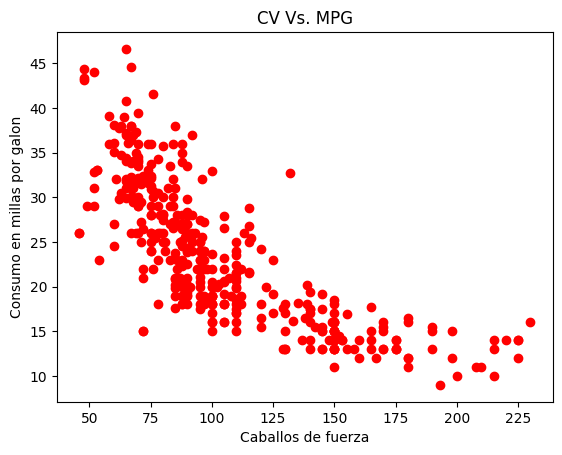

In [127]:
data_auto['mpg'] = data_auto['mpg'].dropna()
data_auto['horsepower'] = data_auto['horsepower'].dropna()
plt.plot(data_auto['horsepower'], data_auto['mpg'], "ro")
plt.xlabel('Caballos de fuerza')
plt.ylabel('Consumo en millas por galon')
plt.title('CV Vs. MPG')

## Modelo de regresión lineal

$$ mpg = a +b*horsepower$$

In [137]:
X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())

X = np.reshape(X, (-1, 1))


In [135]:
linear_model_cars = LinearRegression()
linear_model_cars.fit(X, Y)

LinearRegression()

In [136]:
linear_model_cars.intercept_

39.5338798290345

In [141]:
linear_model_cars.score(X, Y)

0.5746533406450252

El coeficiente de correlacion no indica un estimador de 0.57 de relacion entre variables. Algo bajo

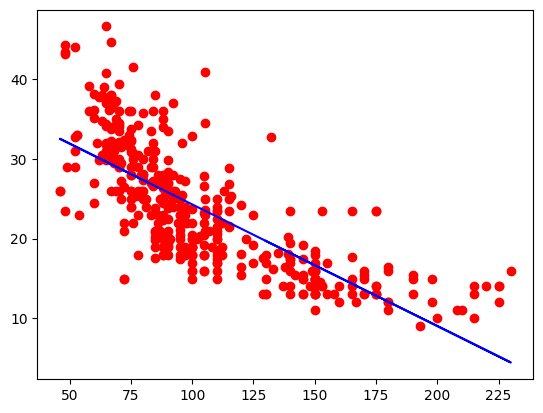

In [138]:
plt.plot(X, Y, "ro")
plt.plot(X, linear_model_cars.predict(X), color = 'blue')

Calculado la diferencia entre la predicción y las observaciones.

In [142]:
SSD = np.sum((Y - linear_model_cars.predict(X))**2)
RSE = np.sqrt(SSD/(len(X)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, error

(10315.751960060918, 5.046879480825511, 0.21462773361633472)

## Modelo de regresión cuadratico

$$ mpg = a + b*horsepower^2$$

In [144]:
X_cuad = X**2

In [145]:
lm_cuad = LinearRegression()
lm_cuad.fit(X_cuad, Y)

LinearRegression()

In [146]:
lm_cuad.score(X_cuad, Y)

0.4849887034823205

In [147]:
SSD = np.sum((Y - linear_model_cars.predict(X_cuad))**2)
RSE = np.sqrt(SSD/(len(X_cuad)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, error

(2349840464.3588185, 2408.749721461127, 102.43646505337529)

## Modelo de regresuón lineal y cuadrático

$$mpg = a + b + c * horsepower^2$$

In [148]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [149]:
X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())

X = np.reshape(X, (-1, 1))

In [150]:
poly = PolynomialFeatures(degree=2)

In [151]:
X_data = poly.fit_transform(X)

In [152]:
lm_mix = linear_model.LinearRegression()
lm_mix.fit(X_data, Y)

LinearRegression()

In [155]:
lm_mix.score(X_data, Y)

0.6439066584257469

## Los outliers

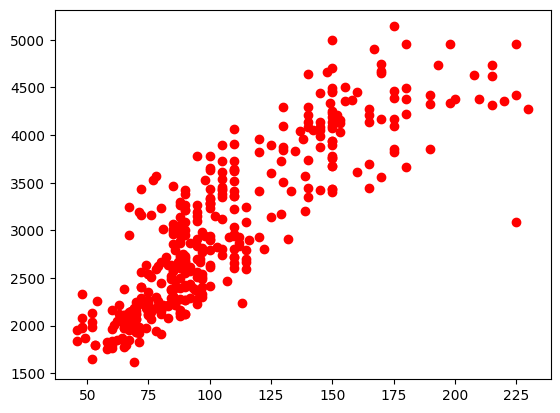

In [156]:
plt.plot(data_auto['horsepower'], data_auto['weight'], 'ro')